# NLTK Grammar Parsing
To go beyond classifying indivdual words in a sentence and summarising counts and frequencies of items, we can consider the grammer structure of sentences.

Using formal grammar to describe the structure of Natural Language with its huge amount of structure variation and word-combinations is very challenging with fixed programmatic approaches.

The Context Free Grammar (CFG) is one approach for tackling the challenge of defining relationships and heirarchies between words in a sentence. "A context-free grammar provides a simple and mathematically precise mechanism for describing the methods by which phrases in some natural language are built from smaller blocks, capturing the "block structure" of sentences in a natural way" (Wikepedia - https://en.wikipedia.org/wiki/Context-free_grammar )

As well as the core Python NLTK library, there is a widely used package called spaCy, which is written in C and Python: https://spacy.io Another well known NLP toolkit is the Stanford CoreNLP package. For more advanced use-cases, it is worth exploring some of these other packages as well as NLTK.

### Notation and Overview
Typically the notation convention is to represent Sentences as "S". This can also be a representation of a sub-sentence that can be used to make a bigger sentence - EG, from the Python NLTK Book Chapter 8:

"If we replaced whole sentences with the symbol S, we would see patterns like Andre said S and I think S. These are templates for taking a sentence and constructing a bigger sentence."

Grammars use recursive productions of the form S → S and S which build up the meaning of a sentence out of the meanings of its parts.

Typical notation for encoding classifications in Syntactic Categories is as follows
S - Sentence
NP - Noun Phrase
VP - Verb Phrase
NN - Singular Noun PP - Prepositional Phrase DT - Determiner
VI - Intransitive Verb
VT - Transitive Verb
IN - Preposition

### NLTK Grammar CFGs

The CFG class is used to encode grammars. Each CFG consists of a start symbol and a set of productions. The "start symbol" specifies the root node value for parse trees which is usually S.

One approach is to develop a custom grammar that is suitable for a narrow, specific domain of text processing and save it as a text file. This text file is then loaded using the CFG.fromstring method and can be used for parsing the sentence.
Example from the NLTK Book, Chapter 8¶

In [1]:
import nltk
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

sentence = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
i=0
for tree in parser.parse(sentence):
    i=i+1
    print("Tree", i)
    print(tree)

Tree 1
(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
Tree 2
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


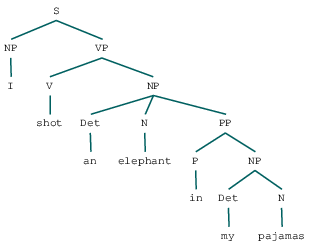

In [3]:
import IPython
IPython.core.display.display(tree)

This shows the abiguity about the phrase "in my pajamas" and whether it describes the elephant or the shooting event.

Observation on the above: praphrasing the NLTK Book (Chapter 8) - it is very hard to scale this approach up for large texts.

# Stanford NLP
The Stanford Core NLP software package is a very comprehensive, well regarded and actively developed NLP toolset written in Java. Although it is written in Java it is easy to call it from Python and reference processed results. It is released under the GNU GPL open-source license.

Without considering the wider capabilities of the Stanford NLP set of packages, it includes a pre-trained Grammar Dependency Parser that works effectively without having to manually develop your own grammar.

Download the Stanford NLP JAR (370 MB) from here: https://stanfordnlp.github.io/CoreNLP/

Unzip this to a suitable location for later reference.
Setup


In [9]:
import os
from nltk.parse.stanford import StanfordDependencyParser
path = 'D:\\libraries\\StanfordNLP\\coreNLP\\'   # Set this to where you have downloaded the JAR file to
path_to_jar = path + 'stanford-corenlp-3.8.0.jar'
path_to_models_jar = path + 'stanford-corenlp-3.8.0-models.jar'
dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

#### Example 1 - Dependency Tree Triples

The parsed result set provides an nltk Dependency Graph object to work with:

In [14]:
import os
os.environ['JAVAHOME'] = 'C:\\Program Files\\Java\\jdk1.8.0_111\\bin\\java.exe'  # Set this to where the JDK is
result = dependency_parser.raw_parse('I shot an elephant in my pajamas')
dep = next(result)  # get next item from the iterator result
for t in dep.triples():
    print(t)

(('shot', 'VBD'), 'nsubj', ('I', 'PRP'))
(('shot', 'VBD'), 'dobj', ('elephant', 'NN'))
(('elephant', 'NN'), 'det', ('an', 'DT'))
(('shot', 'VBD'), 'nmod', ('pajamas', 'NNS'))
(('pajamas', 'NNS'), 'case', ('in', 'IN'))
(('pajamas', 'NNS'), 'nmod:poss', ('my', 'PRP$'))


Background reference for the meaning of the dependency classifications ("nsubj", "nmod" etc) can be found here: http://universaldependencies.org/u/overview/syntax.html and here: http://universaldependencies.org/u/dep/index.html


Find the "root" or "head word" of a phrase:

In [15]:
dep.root["word"]

'shot'

Extract the ** Dependency Tree:**

In [16]:
list(dep.tree())

['I', Tree('elephant', ['an']), Tree('pajamas', ['in', 'my'])]

Draw a Visualization of the dependency tree:


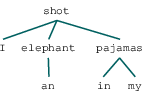

In [17]:
import IPython
IPython.core.display.display(dep.tree())

In [18]:
sentence = "He watched the dark eyeslits narrowing with greed till her eyes were green stones"
result = dependency_parser.raw_parse(sentence)
dep = next(result)
dep.root["word"]

'watched'

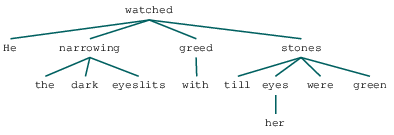

In [19]:
import IPython
IPython.core.display.display(dep.tree())

Head Word: shot


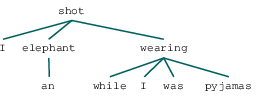

In [20]:
sentence = "I shot an elephant while I was wearing pyjamas"
result = dependency_parser.raw_parse(sentence)
dep = next(result)
print("Head Word:", dep.root["word"])
IPython.core.display.display(dep.tree())

Toy Example Very simple algorithm for deconstructing sentences:
1. Identify the core topic or Head Word
2. Find a Subject, note the word
3. for the Subject, find Compound Entities, add them to Subject-List
4. Find an Object, note the word
5. For the Object, find the Compound Entities, add them to the Oject-List

In [21]:
import re
regexpSubj = re.compile(r'subj')
regexpObj = re.compile(r'obj')
regexNouns = re.compile("^N.*|^PR.*")
root = dep.root["word"]

# A random selection of sentences with different styles, domains etc
sentences = ["He watched the dark eyeslits narrowing with greed till her eyes were green stones",
             "When will the Oracle 12.2 database be released?",
             "Coherence is an in-memory grid cluster for Java code",
             "Oracle 12.2 will be released in March 2017",
             "PyData community gathers to discuss how best to apply languages and tools to continuously evolving challenges in data management, processing, analytics, and visualization.",
             "Arsenal are a football team in North London",
             "When will Arsenal ever win a match?"]

def get_compounds(triples, word):
    compound = []
    for t in triples:
        if t[0][0] == word:
            if regexNouns.search(t[2][1]):
                compound.append(t[2][0])
    return compound

for sentence in sentences:
    
    result = dependency_parser.raw_parse(sentence)
    dep = next(result)
    root = [dep.root["word"]]
    root.append(get_compounds(dep.triples(), root))
    subj = []
    obj = []
    
    for t in dep.triples():
        if regexpSubj.search(t[1]):
            subj.append(t[2][0])
            subj.append(get_compounds(dep.triples(),t[2][0]))
        if regexpObj.search(t[1]):
            obj.append(t[2][0])
            obj.append(get_compounds(dep.triples(),t[2][0]))
    print("\n",sentence)
    print("Subject:",subj, "\nTopic:", root, "\nObject:",obj)


 He watched the dark eyeslits narrowing with greed till her eyes were green stones
Subject: ['He', [], 'eyes', ['her']] 
Topic: ['watched', []] 
Object: ['narrowing', ['eyeslits']]

 When will the Oracle 12.2 database be released?
Subject: ['database', ['Oracle', '12.2']] 
Topic: ['released', []] 
Object: []

 Coherence is an in-memory grid cluster for Java code
Subject: ['Coherence', []] 
Topic: ['cluster', []] 
Object: []

 Oracle 12.2 will be released in March 2017
Subject: ['12.2', ['Oracle']] 
Topic: ['released', []] 
Object: []

 PyData community gathers to discuss how best to apply languages and tools to continuously evolving challenges in data management, processing, analytics, and visualization.
Subject: ['community', ['PyData'], 'best', []] 
Topic: ['gathers', []] 
Object: ['languages', ['tools']]

 Arsenal are a football team in North London
Subject: ['Arsenal', []] 
Topic: ['team', []] 
Object: []

 When will Arsenal ever win a match?
Subject: ['Arsenal', []] 
Topic: ['win

# Summary
In summary, the Grammar Parsing capabilities in Stanford CoreNLP takes us beyond classifying individual words in isolation.

It provides a method to programmatically analyse sentences by looking at their grammar structure and pick out the "root" topic as well as classifying groups of words based on how they form the sentence (Subjects and Objects etc).

# Further Investigation
Develop an improved system for analysing the dependency tree for sentence. Test the accuracy against a set of sentences scraped from the web.